In [1]:
import numpy as np
import time, os, numbers
import pandas as pd
import matplotlib.pyplot as plt
import sys  
import seaborn as sns
sns.set()
sys.path.insert(0, './scripts')
from PricingModels import Element_Pricing_Model, Market, YieldsSpacev2_Pricing_model

In [95]:
token_price = 3
token_supply = 10*1e7
market_value = token_price * token_supply
growth_rate = 0.5 # 50% annualized growth rate
funding_need = market_value # 6 million per year ($200k/yr for 30 staff or $100k/yr for 60 staff)

columns = ['token_price', 'token_supply', 'market_value', 'growth_rate', 'new_tokens', 'funding_acquired', 'old_token_price', 'new_token_price']
df = pd.DataFrame(data=[[token_price, token_supply, market_value, growth_rate, token_supply, market_value, 0, 0]]
    ,columns=columns)
for t in range(1,11):
    growth_rate = growth_rate*0.8
    market_value = market_value * (1 + growth_rate)
    old_token_price = market_value/token_supply
    new_tokens = funding_need/old_token_price
    funding_acquired = 0
    token_price = old_token_price
    # print('{} tokens needed, price from {}→{} diff={}'.format(new_tokens,token_price,market_value/(token_supply+new_tokens),funding_need - funding_acquired))
    while funding_acquired - funding_need < -1:
        print('{} tokens needed, price from {}→{} diff={}'.format(new_tokens,token_price,market_value/(token_supply+new_tokens),funding_acquired - funding_need))
        token_price = market_value/(token_supply+new_tokens)
        new_tokens = funding_need/token_price # update tokens being printed
        funding_acquired = token_price * new_tokens
    token_supply += new_tokens
    df = pd.concat([df,pd.DataFrame(data=[[token_price, token_supply, market_value, growth_rate, new_tokens, funding_acquired, old_token_price, token_price]], columns=columns, index=[t])])
display(df.style.format({'token_supply': '{:,.0f}', 'market_value': '{:,.0f}', 'growth_rate': '{:,.0%}', 'new_tokens': '{:,.0f}', 'funding_acquired': '{:,.0f}'}))

71428571.42857143 tokens needed, price from 4.2→2.4499999999999997 diff=-300000000.0
120372824.45445712 tokens needed, price from 2.4922568807339447→1.617166683847026 diff=-300000000.0
175761803.86785066 tokens needed, price from 1.7068554907729545→1.1929108163852373 diff=-300000000.0
235815070.298851 tokens needed, price from 1.2721833240759666→0.9370849061105779 diff=-300000000.0
300983541.70205873 tokens needed, price from 0.9967322409175704→0.7624614902770344 diff=-300000000.0
372988804.91896516 tokens needed, price from 0.8043136846028862→0.6324960544056739 diff=-300000000.0
454208321.719359 tokens needed, price from 0.6604898802038254→0.5301439667398896 diff=-300000000.0
547420632.2123494 tokens needed, price from 0.5480246493223647→0.44669604418542525 diff=-300000000.0
655758725.131143 tokens needed, price from 0.4574853349301666→0.3772843013620936 diff=-300000000.0
782764367.159288 tokens needed, price from 0.3832570982870912→0.31891755216071915 diff=-300000000.0


,token_price,token_supply,market_value,growth_rate,new_tokens,funding_acquired,old_token_price,new_token_price
0,3.000000,"100,000,000","300,000,000",50%,"100,000,000","300,000,000",0.000000,0.000000
1,2.450000,"222,448,980","420,000,000",40%,"122,448,980","300,000,000",4.200000,2.450000
2,1.617167,"407,958,614","554,400,000",32%,"185,509,634","300,000,000",2.492257,1.617167
3,1.192911,"659,444,304","696,326,400",26%,"251,485,690","300,000,000",1.706855,1.192911
4,0.937085,"979,586,052","838,934,047",20%,"320,141,748","300,000,000",1.272183,0.937085
5,0.762461,"1,373,048,547","976,385,001",16%,"393,462,495","300,000,000",0.996732,0.762461
6,0.632496,"1,847,359,806","1,104,361,736",13%,"474,311,259","300,000,000",0.804314,0.632496
7,0.530144,"2,413,243,828","1,220,162,457",10%,"565,884,022","300,000,000",0.660490,0.530144
8,0.446696,"3,084,841,447","1,322,517,102",8%,"671,597,620","300,000,000",0.548025,0.446696
9,0.377284,"3,879,997,776","1,411,269,723",7%,"795,156,329","300,000,000",0.457485,0.377284


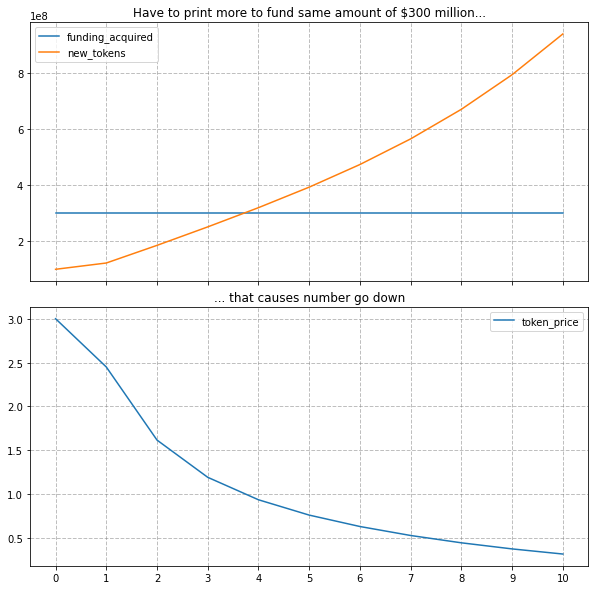

In [116]:
numPlots = 2
fig, ax = plt.subplots(ncols=1, nrows=numPlots,gridspec_kw = {'wspace':0, 'hspace':0.1, 'height_ratios':np.ones(numPlots)}, sharex=True)
fig.patch.set_facecolor('white')   # set fig background color to white

currentPlot = 1
df.plot(use_index=True, y='token_price', figsize=(10,5*numPlots), ax=ax[currentPlot], title='... that causes number go down')
ax[currentPlot].grid(visible=True,linestyle='--', linewidth='1', color='grey',which='both', alpha=0.5)

currentPlot = 0
df.plot(use_index=True, y=['funding_acquired','new_tokens'], figsize=(10,5*numPlots), ax=ax[currentPlot]\
    , title='Have to print more to fund same amount of ${:,.0f} million...'.format(funding_need/1e6))
ax[currentPlot].grid(visible=True,linestyle='--', linewidth='1', color='grey',which='both', alpha=0.5)

#for final plot
ax[currentPlot].set_xlabel('Time (years)')
plt.xticks(df.index)
plt.show()